# Business Case Study: Audiobook app
You are given data from an Audiobook app. Logically, it relates only to the audio versions of books.  We want to create a machine learning model based on our available data that can predict if a customer will buy again from the Audiobook company.

- The data is from an audiobook app, each customer in the database has make a purchase at least once.
- The main idea is that the company shouldn't spend there money targeting individuals who are unlikely to come back.
- If we focus on client who are more likely to convert again we'll get increase the sales and profitability figures.

The model must show us which are the most important metrics for a client to come back.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)
pd.set_option("display.float_format", "{:.2f}".format)

In [2]:
columns = ["ID", "Book_length(mins)_overall", "Book_length(mins)_avg", "Price_overall", "Price_avg", 
         "Review", "Review10/10", "Completion", "Minutes_listened", "Support_Request", "Last_Visited_mins_Purchase_date", 
         "Target"]

data = pd.read_csv("data/Audiobooks_data.csv", header=None)
data.columns = columns
data.set_index('ID', drop=True, inplace=True)
data.index.name =None

data.head()

,Book_length(mins)_overall,Book_length(mins)_avg,Price_overall,Price_avg,Review,Review10/10,Completion,Minutes_listened,Support_Request,Last_Visited_mins_Purchase_date,Target
994,1620.00,1620,19.73,19.73,1,10.00,0.99,1603.80,5,92,0
1143,2160.00,2160,5.33,5.33,0,8.91,0.00,0.00,0,0,0
2059,2160.00,2160,5.33,5.33,0,8.91,0.00,0.00,0,388,0
2882,1620.00,1620,5.96,5.96,0,8.91,0.42,680.40,1,129,0
3342,2160.00,2160,5.33,5.33,0,8.91,0.22,475.20,0,361,0


# 1. Getting aquainted with the dataset

- `ÌD`: is like a name.

- `Book_length(mins)_overall`: is the sum of the lengths of purchases.

- `Book_length(mins)_avg`: is the sum of the lengths of purchases divided by the number of purchases. Notice we don't need the number of purchases column because we ca get it from `Book_length(mins)_overall` / `Book_length(mins)_avg`.

- `Price_overall` & `Price_avg`: Same as Book length, the price variable is almost always a good predictor.

- `Review`: is boolean. It shows if the customer left a review. If so, `Review10/10` saves the review left by the user. While most users don't left a review we fill the missing reviews by avrage review column.

- `Minutes_listened`: is a measure of engagement, the total of minutes the user listen to audiobooks.

- `Completion`: is the `Minutes_listened` / `Book_length(mins)_overall`.

- `Support_Request`: Shows the total number of support request (forgotten password to assistance).

- `Last_Visited_mins_Purchase_date`: the bigger the difference, the bigger sooner the engagement. If the value is 0, we are sure the customer has never accessed what he/she has bought.

The data was gathered from the audiobook app, the input data represents `2 years` worth of engagement. We are doing supervised learning so we need `target`. We took extra `6 month` to check if the user converted or not. 1 if the customer buys in the next 6 months, 0 if the customer didn't.

- `target`: 1 if the customer bought again in the last 6 months of data. 0 if the customer did not buy again.

# 2. Exploratory Data Analysis

In [3]:
data.describe()

,Book_length(mins)_overall,Book_length(mins)_avg,Price_overall,Price_avg,Review,Review10/10,Completion,Minutes_listened,Support_Request,Last_Visited_mins_Purchase_date,Target
count,14084.00,14084.00,14084.00,14084.00,14084.00,14084.00,14084.00,14084.00,14084.00,14084.00,14084.00
mean,1591.28,1678.61,7.10,7.54,0.16,8.91,0.13,189.89,0.07,61.94,0.16
std,504.34,654.84,4.93,5.56,0.37,0.64,0.24,371.08,0.47,88.21,0.37
min,216.00,216.00,3.86,3.86,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,1188.00,1188.00,5.33,5.33,0.00,8.91,0.00,0.00,0.00,0.00,0.00
50%,1620.00,1620.00,5.95,6.07,0.00,8.91,0.00,0.00,0.00,11.00,0.00
75%,2160.00,2160.00,8.00,8.00,0.00,8.91,0.13,194.40,0.00,105.00,0.00
max,2160.00,7020.00,130.94,130.94,1.00,10.00,1.00,2160.00,30.00,464.00,1.00


In [4]:
data.isnull().sum()

Book_length(mins)_overall          0
Book_length(mins)_avg              0
Price_overall                      0
Price_avg                          0
Review                             0
Review10/10                        0
Completion                         0
Minutes_listened                   0
Support_Request                    0
Last_Visited_mins_Purchase_date    0
Target                             0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14084 entries, 994 to 251
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Book_length(mins)_overall        14084 non-null  float64
 1   Book_length(mins)_avg            14084 non-null  int64  
 2   Price_overall                    14084 non-null  float64
 3   Price_avg                        14084 non-null  float64
 4   Review                           14084 non-null  int64  
 5   Review10/10                      14084 non-null  float64
 6   Completion                       14084 non-null  float64
 7   Minutes_listened                 14084 non-null  float64
 8   Support_Request                  14084 non-null  int64  
 9   Last_Visited_mins_Purchase_date  14084 non-null  int64  
 10  Target                           14084 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 1.3 MB


## `Book_length(mins)_overall` & `Book_length(mins)_avg`

- `Book_length(mins)_overall`: is the sum of the lengths of purchases.

- `Book_length(mins)_avg`: is the sum of the lengths of purchases divided by the number of purchases. Notice we don't need the number of purchases column because we ca get it from `Book_length(mins)_overall` / `Book_length(mins)_avg`.

In [6]:
def book_length(length):
    if length > 1200:
        return 1
    else:
        return 0
    
data['purchases_hour_>3h'] = data['Book_length(mins)_overall'].apply(book_length)

In [7]:
data['Book_length(mins)_avg'].apply(book_length).value_counts()

1    9480
0    4604
Name: Book_length(mins)_avg, dtype: int64

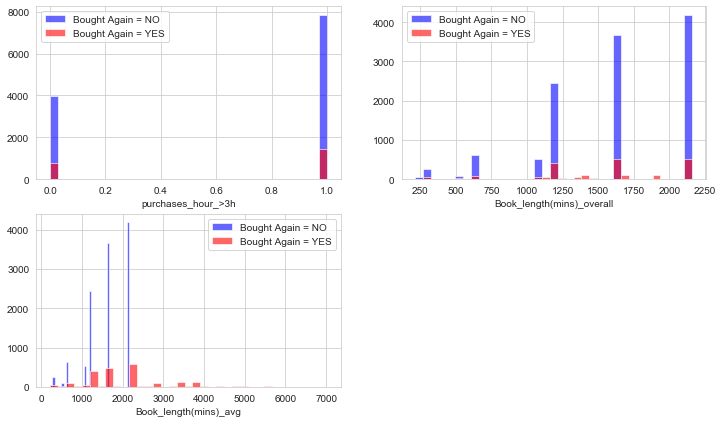

In [8]:
columns = ['purchases_hour_>3h', 'Book_length(mins)_overall', 'Book_length(mins)_avg']
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## `Price_overall` & `Price_avg`

- `Price_overall` & `Price_avg`: Same as Book length, the price variable is almost always a good predictor.

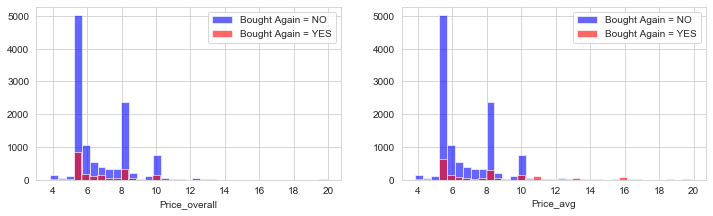

In [9]:
columns = ["Price_overall", "Price_avg"]
plt.figure(figsize=(12, 7))
df = data[(data.Price_overall < 20) & (data.Price_avg < 20)]

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    df[df["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    df[df["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## `Review` & `Review10/10`
- `Review`: is boolean. It shows if the customer left a review. If so, `Review10/10` saves the review left by the user. While most users don't left a review we fill the missing reviews by avrage review column.

In [10]:
print(data[data['Review'] == 0].Target.value_counts(normalize=True))
print(data[data['Review'] == 1].Target.value_counts(normalize=True))

0   0.84
1   0.16
Name: Target, dtype: float64
0   0.83
1   0.17
Name: Target, dtype: float64


In [11]:
data['Review10/10'].value_counts()

8.91     11616
10.00     1284
8.00       404
9.00       381
7.00       157
6.00       104
5.00        43
9.50        21
4.00        18
8.50        11
1.00        10
3.00         9
2.00         7
6.50         5
8.33         2
5.50         2
8.67         2
7.50         2
6.67         1
1.50         1
9.40         1
7.75         1
4.50         1
9.67         1
Name: Review10/10, dtype: int64

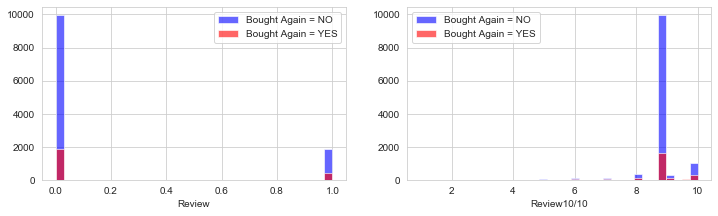

In [12]:
columns = ["Review", "Review10/10"]
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## `Minutes_listened` & `Completion`
- `Minutes_listened`: is a measure of engagement, the total of minutes the user listen to audiobooks.
- `Completion`: is the `Minutes_listened` / `Book_length(mins)_overall`.

In [13]:
def listened_to_books(minutes):
    if minutes > 0.0:
        return 0
    else:
        return 1
data['listened_to_books'] = data.Minutes_listened.apply(listened_to_books)

In [14]:
def completion_state(minutes):
    if minutes > 0.5:
        return 1
    else:
        return 0
data['completion_state'] = data.Completion.apply(completion_state)

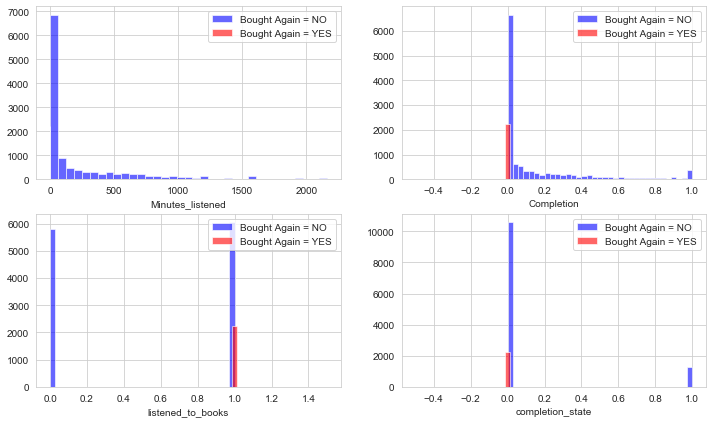

In [15]:
columns = ["Minutes_listened", "Completion", "listened_to_books", "completion_state"]
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [16]:
data.drop('Minutes_listened', axis=1, inplace=True)

## `Support_Request` & `Last_Visited_mins_Purchase_date`

- `Support_Request`: Shows the total number of support request (forgotten password to assistance).
- `Last_Visited_mins_Purchase_date`: the bigger the difference, the bigger sooner the engagement. If the value is 0, we are sure the customer has never accessed what he/she has bought.

In [17]:
def asked_for_request(request):
    if request == 0:
        return 0
    else:
        return 1
    
data["asked_for_request"] = data.Support_Request.apply(asked_for_request)

In [18]:
def acc_purchases(purchase):
    if purchase == 0:
        return 0
    else:
        return 1
data['acc_purchases'] = data.Last_Visited_mins_Purchase_date.apply(acc_purchases)

In [19]:
data.Last_Visited_mins_Purchase_date.value_counts()

0      5493
1       357
2       198
3       165
5       140
       ... 
354       1
338       1
369       1
464       1
379       1
Name: Last_Visited_mins_Purchase_date, Length: 371, dtype: int64

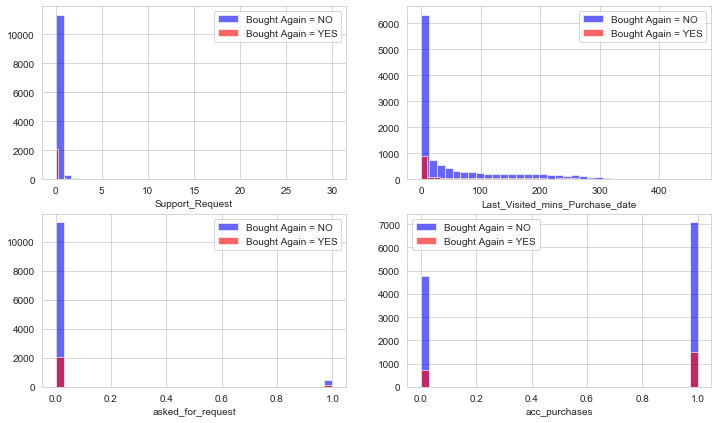

In [20]:
columns = ["Support_Request", "Last_Visited_mins_Purchase_date", "asked_for_request", "acc_purchases"]
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [21]:
data.drop('Support_Request', axis=1, inplace=True)

In [22]:
print(f"{data.Target.value_counts()}")
print(f"{data.Target.value_counts()[0] / data.Target.value_counts()[1]}")

0    11847
1     2237
Name: Target, dtype: int64
5.295932051855163


It is important to notice that our `target` variable is inbabalanced. We have only `2237` user who convert again in the `6 month` period. The data need to be balanced.

# 3. Data Pre-processing

Since we are dealing with real life data, we will need to preprocess it a bit. This is the relevant code which is not that hard but refers to data engineering more than machine learning.

- Handling categorical features

- Balance the dataset. 

### Handling categorical features

In [23]:
dummies = [column for column in data.drop('Target', axis=1).columns if data[column].nunique() < 10]

In [24]:
data_1 = pd.get_dummies(data, columns=dummies, drop_first=True)
data_1.head()

,Book_length(mins)_overall,Book_length(mins)_avg,Price_overall,Price_avg,Review10/10,Completion,Last_Visited_mins_Purchase_date,Target,Review_1,purchases_hour_>3h_1,listened_to_books_1,completion_state_1,asked_for_request_1,acc_purchases_1
994,1620.00,1620,19.73,19.73,10.00,0.99,92,0,1,1,0,1,1,1
1143,2160.00,2160,5.33,5.33,8.91,0.00,0,0,0,1,1,0,0,0
2059,2160.00,2160,5.33,5.33,8.91,0.00,388,0,0,1,1,0,0,1
2882,1620.00,1620,5.96,5.96,8.91,0.42,129,0,0,1,0,0,1,1
3342,2160.00,2160,5.33,5.33,8.91,0.22,361,0,0,1,0,0,0,1


### Check Duplicate columns and Rows

In [25]:
print(data_1.shape)

# Remove duplicate Features
data_1 = data_1.T.drop_duplicates()
data_1 = data_1.T

# Remove Duplicate Rows
data_1.drop_duplicates(inplace=True)

print(data_1.shape)

(14084, 14)
(9350, 14)


In [26]:
data_1.Target.value_counts()

0.00    7548
1.00    1802
Name: Target, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

X = data_1.drop('Target', axis=1)
y = data_1.Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# 4. Model Building

## Logistic Regression 

In [29]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(solver='liblinear', penalty='l2')
lr_classifier.fit(X_train, y_train)

print_score(lr_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(lr_classifier, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.73%
_______________________________________________
Classification Report:	Precision Score: 94.01%
			Recall Score: 50.47%
			F1 score: 65.68%
_______________________________________________
Confusion Matrix: 
 [[5230   41]
 [ 631  643]]

Test Result:
Accuracy Score: 89.70%
_______________________________________________
Classification Report:	Precision Score: 92.23%
			Recall Score: 49.43%
			F1 score: 64.36%
_______________________________________________
Confusion Matrix: 
 [[2255   22]
 [ 267  261]]



### Cross Validation Score for Logistic Regression

In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_classifier, X, y, cv=5)
print(f"Logistic Accuracy: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

Logistic Accuracy: 89.42% +/- (0.82)


## Random Forest Classifier

In [31]:
zeros = (y_train.value_counts()[0] / y_train.shape)[0]
ones = (y_train.value_counts()[1] / y_train.shape)[0]

print(f"Doesn't purchase again users Rate: {zeros * 100:.2f}%")
print(f"Purchase again users Rate: {ones * 100 :.2f}%")

Doesn't purchase again users Rate: 80.53%
Purchase again users Rate: 19.47%


In [32]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=1500)
rand_forest.fit(X_train, y_train)

print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.98%
_______________________________________________
Classification Report:	Precision Score: 97.98%
			Recall Score: 91.52%
			F1 score: 94.64%
_______________________________________________
Confusion Matrix: 
 [[5247   24]
 [ 108 1166]]

Test Result:
Accuracy Score: 87.59%
_______________________________________________
Classification Report:	Precision Score: 67.31%
			Recall Score: 66.29%
			F1 score: 66.79%
_______________________________________________
Confusion Matrix: 
 [[2107  170]
 [ 178  350]]



In [33]:
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(n_estimators=100, oob_score=True, class_weight={0:zeros, 1:ones})

param_grid = {'n_estimators':[100, 500, 1000, 1500],
              'max_depth':[3, 5, 7, 10, 15, None], 
              'min_samples_split':[2, 3, 10], 
              'min_samples_leaf':[1, 3, 5, 7, 10], 
              'criterion':["gini", "entropy"]}

rf_grid_cv = GridSearchCV(rf_clf, param_grid, scoring="f1", n_jobs=-1, verbose=1, cv=3)
# rf_grid_cv.fit(X_train, y_train)

In [34]:
# rf_grid_cv.best_estimator_

In [35]:
rf_clf = RandomForestClassifier(criterion='entropy',
                                max_depth=15,
                                min_samples_leaf=1, 
                                min_samples_split=10,
                                n_estimators=500, 
                                oob_score=True, 
                                class_weight={0:zeros, 1:ones})

rf_clf.fit(X_train, y_train)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 91.32%
_______________________________________________
Classification Report:	Precision Score: 99.30%
			Recall Score: 55.81%
			F1 score: 71.46%
_______________________________________________
Confusion Matrix: 
 [[5266    5]
 [ 563  711]]

Test Result:
Accuracy Score: 91.48%
_______________________________________________
Classification Report:	Precision Score: 98.33%
			Recall Score: 55.68%
			F1 score: 71.10%
_______________________________________________
Confusion Matrix: 
 [[2272    5]
 [ 234  294]]



### Cross Validation Score for Random Forest Classifier

In [36]:
scores = cross_val_score(rf_clf, X, y, cv=5, scoring='f1')
print(scores)
print(f"Random Forest F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.69473684 0.73776224 0.69189189 0.67985612 0.70483005]
Random Forest F1_score: 70.18% +/- (1.97)


## XGBoost Classifier

In [37]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(learning_rate=0.5, 
                        n_estimators=150, 
                        base_score=0.3)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 93.49%
_______________________________________________
Classification Report:	Precision Score: 94.35%
			Recall Score: 70.80%
			F1 score: 80.90%
_______________________________________________
Confusion Matrix: 
 [[5217   54]
 [ 372  902]]

Test Result:
Accuracy Score: 90.09%
_______________________________________________
Classification Report:	Precision Score: 81.09%
			Recall Score: 61.74%
			F1 score: 70.11%
_______________________________________________
Confusion Matrix: 
 [[2201   76]
 [ 202  326]]



In [38]:
from sklearn.model_selection import RandomizedSearchCV

xgb_clf = XGBClassifier(learning_rate=0.5, 
                        n_estimators=150, 
                        base_score=0.3)

hyperparameter_grid = {'colsample_bytree': [ 0.5, 0.75, 0.85, 0.9, 1], 
                       'colsample_bylevel': [ 0.5, 0.75, 0.85, 0.9, 1],
                       'colsample_bynode': [ 0.5, 0.75, 0.85, 0.9, 1],
#                        'learning_rate' : [0.01, 0.5, 0.1], 
#                        'n_estimators': [100, 350, 500],
                       'min_child_weight' : [2, 3, 5, 10],
                       'max_depth': [3, 5, 10, 15], 
#                        'base_score' : [0.1, 0.5, 0.9]
                      }

xgb_grid_cv = GridSearchCV(xgb_clf, hyperparameter_grid, scoring="f1", 
                           n_jobs=-1, verbose=1, cv=3)
# xgb_grid_cv.fit(X_train, y_train)

In [39]:
# xgb_grid_cv.best_estimator_

In [40]:
xgb_clf = XGBClassifier(base_score=0.3, 
                        min_child_weight=2,
                        max_depth=3,
                        colsample_bytree=0.85,
                        colsample_bylevel=0.5,
                        colsample_bynode=0.5,
                        learning_rate=0.5, 
                        n_estimators=150)

xgb_clf.fit(X_train, y_train)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 92.28%
_______________________________________________
Classification Report:	Precision Score: 95.40%
			Recall Score: 63.42%
			F1 score: 76.19%
_______________________________________________
Confusion Matrix: 
 [[5232   39]
 [ 466  808]]

Test Result:
Accuracy Score: 90.45%
_______________________________________________
Classification Report:	Precision Score: 85.91%
			Recall Score: 58.90%
			F1 score: 69.89%
_______________________________________________
Confusion Matrix: 
 [[2226   51]
 [ 217  311]]



### Cross Validation Score for XGBoost Classifier

In [41]:
scores = cross_val_score(xgb_clf, X, y, cv=5, scoring='f1')
print(scores)
print(f"XGBoost F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.69337442 0.63096961 0.67572156 0.69122807 0.70731707]
XGBoost F1_score: 67.97% +/- (2.64)
